In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ecotools.pi_client import pi_client

sns.set('paper')
# Option Paramater time_zone
# default timezone is time_zone='America/Los_Angeles' use https://www.iana.org/time-zones 

#pi = pi_client(username= r'ad3\username')
pi = pi_client(username = r'ad3\sbharadw')

ad3\sbharadw, please provide your password (text will be hidden) 
>>········
save password? [y/n] /n after saving, set username = 'file' to use this feature 
>>y


In [2]:
# tags = pi.search_by_point(['aiTIT4045*'])

tag1 = pi.search_by_point(['*tercero*elec*kbtu'])

tag1

['Tercero1_Electricity_Demand_kBtu',
 'Tercero2_Electricity_Demand_kBtu',
 'Tercero3_Electricity_Demand_kBtu',
 'Tercero4_Electricity_Demand_kBtu',
 'TerceroDC_Electricity_Demand_kBtu']

In [3]:
# Required parameters
start = '2017-03-01'
end = '2020-03-01'    

calc = 'summary' # Can be 'summary', 'interpolated', or 'recorded'
interval = '1h' # Can be '15min', '1h', '1d', or '1mo'   

# Extras
chunk_size = 10
weight = 'TimeWeighted'
summary_calc = 'average' # Can be 'average', 'minimum', 'maximum', 'range', 'stddev', 'count', 'percentgood', 'max', 'total', 'none', 'all'
max_count = round(1500000/len(tag1))

elec = pi.get_stream_by_point(tag1, start=start, end=end, _convert_cols=False, calculation=calc, 
                            interval=interval, _weight=weight, _summary_type=summary_calc, _max_count=max_count, 
                            _chunk_size=chunk_size)
elec.head()

09:06:55: Sending API request... Chunk 1 of 1
09:07:16: Response recieved for 5 tags! (21.59)


,Tercero1_Electricity_Demand_kBtu,Tercero2_Electricity_Demand_kBtu,Tercero3_Electricity_Demand_kBtu,Tercero4_Electricity_Demand_kBtu,TerceroDC_Electricity_Demand_kBtu
Timestamp,,,,,
2017-03-01 00:00:00,457.303956,575.972911,638.098436,NaN,386.965454
2017-03-01 01:00:00,429.935683,455.031512,509.643553,NaN,378.948348
2017-03-01 02:00:00,399.493724,403.648512,463.438002,NaN,366.980825
2017-03-01 03:00:00,385.761193,369.047334,387.064366,NaN,370.128292
2017-03-01 04:00:00,373.793875,354.866003,358.264653,NaN,363.029660


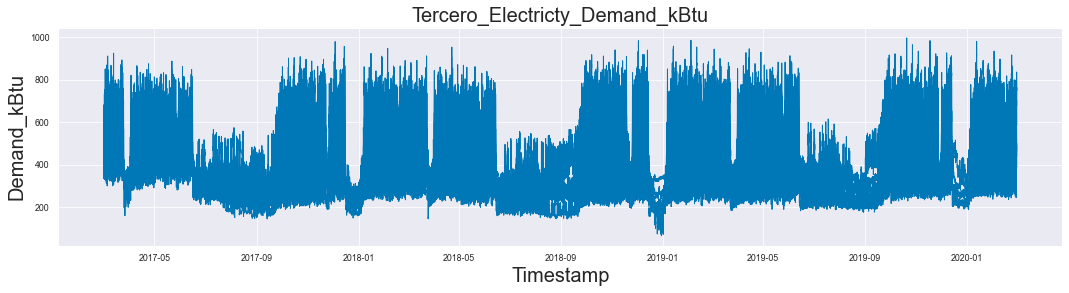

In [10]:
colors = ["#0077b6","#0077b6"]

plt.figure(figsize =(18,4))

plt.plot(elec, linewidth=1, color="#0077b6")

plt.xlabel("Timestamp",fontsize = 20)
plt.ylabel("Demand_kBtu",fontsize = 20)

plt.title("Tercero_Electricty_Demand_kBtu",fontsize = 20)

plt.show()

In [11]:
# The overall pattern that I have noticed is that for electricty and chilled 
#water tercero 3 has the highest hourly demand which could be due to more 
# residents residing there or the building facilities construction requiring it to 
#use more energy in that area

In [12]:
elec.to_csv('pidataElec.csv',index=False)
#elec.columns
elec.dropna(subset = ['Tercero3_Electricity_Demand_kBtu'], inplace=True)
elec.sort_values(by='Tercero3_Electricity_Demand_kBtu', ascending=False)


,Tercero1_Electricity_Demand_kBtu,Tercero2_Electricity_Demand_kBtu,Tercero3_Electricity_Demand_kBtu,Tercero4_Electricity_Demand_kBtu,TerceroDC_Electricity_Demand_kBtu
Timestamp,,,,,
2019-10-20 21:00:00,542.812152,729.306844,997.239634,525.958763,519.172012
2019-02-03 21:00:00,539.362635,678.810188,986.066269,516.951059,414.427528
2019-11-17 20:00:00,521.434139,695.246226,984.743924,524.298520,529.343201
2018-12-02 21:00:00,542.484601,666.177879,984.053828,524.610315,444.485865
2020-01-12 19:00:00,528.525441,715.067383,981.249137,556.377062,608.285690
...,...,...,...,...,...
2018-01-01 16:00:00,292.132724,262.838901,193.721340,160.898766,262.777060
2017-08-16 05:00:00,315.755439,259.375448,193.687652,194.501131,346.421075
2018-12-29 17:00:00,337.563881,264.547422,193.171779,150.944422,179.495303


In [13]:
# tags = pi.search_by_point(['aiTIT4045*'])

tag2 = pi.search_by_point(['*tercero*ChilledWater*kbtu'])

tag2

['Tercero1_ChilledWater_Demand_kBtu',
 'Tercero2_ChilledWater_Demand_kBtu',
 'Tercero3_ChilledWater_Demand_kBtu',
 'Tercero4_ChilledWater_Demand_kBtu',
 'TerceroDC_ChilledWater_Demand_kBtu']

In [14]:
# Required parameters
start = '2017-03-01'
end = '2020-03-01'    

calc = 'summary' # Can be 'summary', 'interpolated', or 'recorded'
interval = '1h' # Can be '15min', '1h', '1d', or '1mo'   

# Extras
chunk_size = 10
weight = 'TimeWeighted'
summary_calc = 'average' # Can be 'average', 'minimum', 'maximum', 'range', 'stddev', 'count', 'percentgood', 'max', 'total', 'none', 'all'
max_count = round(1500000/len(tag2))

chw = pi.get_stream_by_point(tag2, start=start, end=end, _convert_cols=False, calculation=calc, 
                            interval=interval, _weight=weight, _summary_type=summary_calc, _max_count=max_count, 
                            _chunk_size=chunk_size)
chw.head()

09:08:01: Sending API request... Chunk 1 of 1
09:08:07: Response recieved for 5 tags! (6.22)


,Tercero1_ChilledWater_Demand_kBtu,Tercero2_ChilledWater_Demand_kBtu,Tercero3_ChilledWater_Demand_kBtu,Tercero4_ChilledWater_Demand_kBtu,TerceroDC_ChilledWater_Demand_kBtu
Timestamp,,,,,
2017-03-01 00:00:00,0.0,0.0,300.000000,NaN,0.000000
2017-03-01 01:00:00,0.0,0.0,300.000000,NaN,0.000000
2017-03-01 02:00:00,0.0,0.0,403.124119,NaN,0.000000
2017-03-01 03:00:00,0.0,0.0,567.010500,NaN,0.000000
2017-03-01 04:00:00,0.0,0.0,354.985184,NaN,10.766043


In [15]:
chw.to_csv('pidataChw.csv',index=False)
#elec.columns
chw.dropna(subset = ['Tercero3_ChilledWater_Demand_kBtu'], inplace=True)
chw.sort_values(by='Tercero3_ChilledWater_Demand_kBtu', ascending=False)

,Tercero1_ChilledWater_Demand_kBtu,Tercero2_ChilledWater_Demand_kBtu,Tercero3_ChilledWater_Demand_kBtu,Tercero4_ChilledWater_Demand_kBtu,TerceroDC_ChilledWater_Demand_kBtu
Timestamp,,,,,
2019-06-12 17:00:00,1580.000000,1445.558153,3583.044429,1844.406111,2041.480316
2019-06-12 15:00:00,1595.000000,1454.284555,3582.087898,1790.223594,2011.735640
2019-06-12 18:00:00,1603.022747,1456.961732,3578.868690,1774.122809,2190.713973
2018-05-29 17:00:00,757.000000,1237.987244,3549.261170,1525.131418,479.000000
2019-06-12 16:00:00,1581.568500,1409.000000,3536.402028,1824.533690,2031.923450
...,...,...,...,...,...
2017-12-19 06:00:00,0.000000,71.000000,66.971356,0.000000,5.000000
2017-12-19 05:00:00,0.000000,71.000000,56.516854,0.000000,5.000000
2017-12-22 11:00:00,0.000000,71.000000,56.000000,76.304963,5.000000


Text(0.5, 1.0, 'Tercero_ChilledWater_Demand_kBtu')

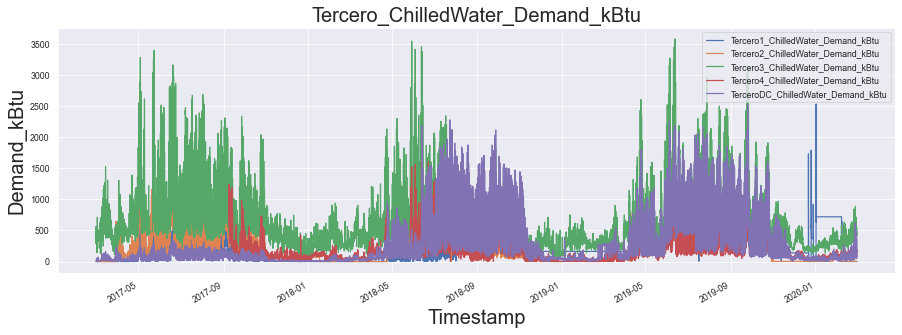

In [25]:
chw.plot(figsize=(15,5))


plt.xlabel("Timestamp",fontsize = 20)
plt.ylabel("Demand_kBtu",fontsize = 20)

plt.title("Tercero_ChilledWater_Demand_kBtu",fontsize = 20)


In [26]:
#This plot has a lot of outliers too however when looking at the time and 2019-01 & 2020-01 there is a
# stagnation of a constant horizontal line which could be an error in the data for Tercero 1 because that is the only one where I noticed this

In [27]:
# tags = pi.search_by_point(['aiTIT4045*'])

tag3 = pi.search_by_point(['Tercero1_Steam_Demand_kBtu',
 'Tercero2_Steam_Demand_kBtu',
 'Tercero3_Steam_Demand_kBtu',
 'Tercero4_Steam_Demand_kBtu',
 'TerceroDC_Steam_Demand_kBtu'])

tag3

['Tercero1_Steam_Demand_kBtu',
 'Tercero2_Steam_Demand_kBtu',
 'Tercero3_Steam_Demand_kBtu',
 'Tercero4_Steam_Demand_kBtu',
 'TerceroDC_Steam_Demand_kBtu']

In [28]:
# Required parameters
start = '2017-03-01'
end = '2020-03-01'    

calc = 'summary' # Can be 'summary', 'interpolated', or 'recorded'
interval = '1h' # Can be '15min', '1h', '1d', or '1mo'   

# Extras
chunk_size = 10
weight = 'TimeWeighted'
summary_calc = 'average' # Can be 'average', 'minimum', 'maximum', 'range', 'stddev', 'count', 'percentgood', 'max', 'total', 'none', 'all'
max_count = round(1500000/len(tag3))

steam = pi.get_stream_by_point(tag3, start=start, end=end, _convert_cols=False, calculation=calc, 
                            interval=interval, _weight=weight, _summary_type=summary_calc, _max_count=max_count, 
                            _chunk_size=chunk_size)
steam.head()

09:14:02: Sending API request... Chunk 1 of 1
09:14:12: Response recieved for 5 tags! (9.18)


,Tercero1_Steam_Demand_kBtu,Tercero2_Steam_Demand_kBtu,Tercero3_Steam_Demand_kBtu,Tercero4_Steam_Demand_kBtu,TerceroDC_Steam_Demand_kBtu
Timestamp,,,,,
2017-03-01 00:00:00,579.089724,630.407247,1800.000000,NaN,327.645407
2017-03-01 01:00:00,540.633370,390.340377,1800.000000,NaN,372.346742
2017-03-01 02:00:00,529.851754,404.387048,1750.842084,NaN,232.940943
2017-03-01 03:00:00,494.646599,426.881994,1500.000000,NaN,209.506231
2017-03-01 04:00:00,559.490547,486.885093,1500.000000,NaN,142.437719


In [29]:
steam.to_csv('pidataChw.csv',index=False)
#elec.columns
steam.dropna(subset = ['Tercero1_Steam_Demand_kBtu',
 'Tercero2_Steam_Demand_kBtu',
 'Tercero3_Steam_Demand_kBtu',
 'Tercero4_Steam_Demand_kBtu',
 'TerceroDC_Steam_Demand_kBtu'], inplace=True)
steam.sort_values(by='Tercero3_Steam_Demand_kBtu', ascending=False)


,Tercero1_Steam_Demand_kBtu,Tercero2_Steam_Demand_kBtu,Tercero3_Steam_Demand_kBtu,Tercero4_Steam_Demand_kBtu,TerceroDC_Steam_Demand_kBtu
Timestamp,,,,,
2020-01-17 09:00:00,1121.382097,1145.862336,2800.0,1640.891891,2302.966471
2020-01-17 08:00:00,1088.666920,1200.916132,2800.0,1636.925202,2452.687659
2020-01-10 08:00:00,1214.193454,1015.787806,2800.0,1758.785335,2264.814951
2020-01-07 09:00:00,1098.819897,1391.690435,2800.0,1526.160876,2532.408334
2020-01-07 08:00:00,1112.488553,1226.053155,2800.0,1686.834311,2320.191431
...,...,...,...,...,...
2018-06-20 15:00:00,4.056000,60.929028,0.0,75.359694,607.762015
2018-06-20 14:00:00,4.056000,18.252001,0.0,74.768146,518.694169
2018-06-20 13:00:00,4.056000,18.252001,0.0,87.008823,430.586047


Text(0.5, 1.0, 'Tercero_Steam_Demand_kBtu')

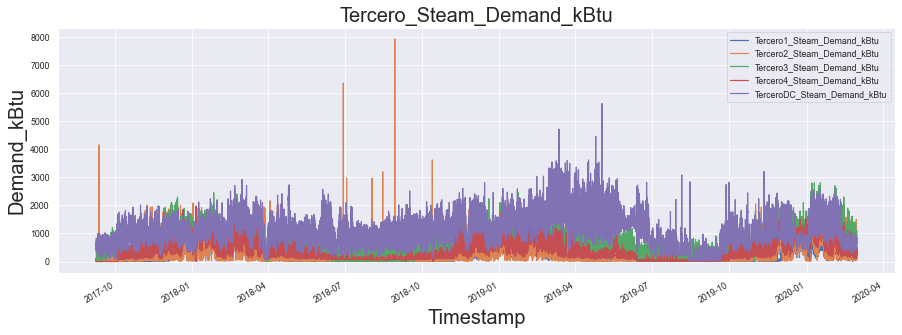

In [30]:
steam.plot(figsize=(15,5))
plt.xlabel("Timestamp",fontsize = 20)
plt.ylabel("Demand_kBtu",fontsize = 20)

plt.title("Tercero_Steam_Demand_kBtu",fontsize = 20)

In [31]:
# The plot above shows alot of outliers and multiple peaks but overall is more consistent than th other plots

In [32]:
#part 2

In [33]:
# tags = pi.search_by_point(['aiTIT4045*'])

tag4 = pi.search_by_point(['*tercero*elec*kbtu'])

tag4

['Tercero1_Electricity_Demand_kBtu',
 'Tercero2_Electricity_Demand_kBtu',
 'Tercero3_Electricity_Demand_kBtu',
 'Tercero4_Electricity_Demand_kBtu',
 'TerceroDC_Electricity_Demand_kBtu']

In [34]:
# Required parameters
start = '2017-03-01'
end = '2020-03-01'    

calc = 'summary' # Can be 'summary', 'interpolated', or 'recorded'
interval = '1mo' # Can be '15min', '1h', '1d', or '1mo'   

# Extras
chunk_size = 10
weight = 'TimeWeighted'
summary_calc = 'average' # Can be 'average', 'minimum', 'maximum', 'range', 'stddev', 'count', 'percentgood', 'max', 'total', 'none', 'all'
max_count = round(1500000/len(tag4))

elec_month = pi.get_stream_by_point(tag4, start=start, end=end, _convert_cols=False, calculation=calc, 
                            interval=interval, _weight=weight, _summary_type=summary_calc, _max_count=max_count, 
                            _chunk_size=chunk_size)
elec_month.head()

09:14:22: Sending API request... Chunk 1 of 1
09:14:24: Response recieved for 5 tags! (2.31)


,Tercero1_Electricity_Demand_kBtu,Tercero2_Electricity_Demand_kBtu,Tercero3_Electricity_Demand_kBtu,Tercero4_Electricity_Demand_kBtu,TerceroDC_Electricity_Demand_kBtu
Timestamp,,,,,
2017-03-01,417.907248,454.030566,546.466664,NaN,418.407259
2017-04-01,434.561594,460.252222,570.895000,NaN,444.496207
2017-05-01,441.193662,482.467775,580.231429,NaN,473.457870
2017-06-01,399.468264,395.890516,435.864701,249.185394,424.347101
2017-07-01,371.454531,310.069052,296.815345,243.192014,358.330502


Text(0.5, 1.0, 'Tercero_Monthly_Electricty_Demand_kBtu')

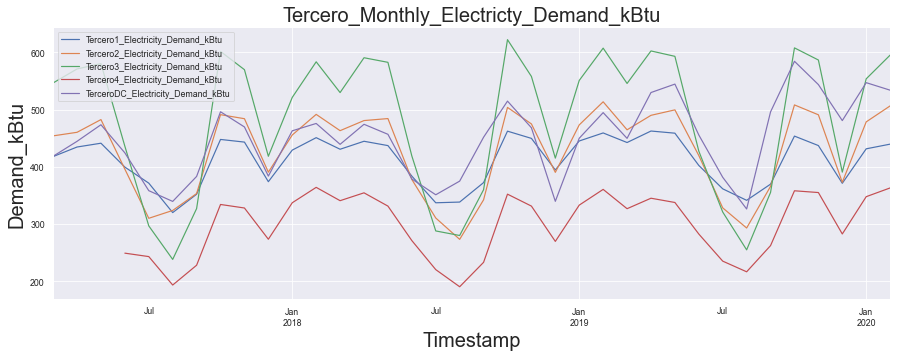

In [35]:
elec_month.plot(figsize=(15,5))
plt.xlabel("Timestamp",fontsize = 20)
plt.ylabel("Demand_kBtu",fontsize = 20)

plt.title("Tercero_Monthly_Electricty_Demand_kBtu",fontsize = 20)


In [36]:
# tags = pi.search_by_point(['aiTIT4045*'])

tag5 = pi.search_by_point(['*tercero*ChilledWater*kbtu'])

tag5

['Tercero1_ChilledWater_Demand_kBtu',
 'Tercero2_ChilledWater_Demand_kBtu',
 'Tercero3_ChilledWater_Demand_kBtu',
 'Tercero4_ChilledWater_Demand_kBtu',
 'TerceroDC_ChilledWater_Demand_kBtu']

In [37]:
# Required parameters
start = '2017-03-01'
end = '2020-03-01'    

calc = 'summary' # Can be 'summary', 'interpolated', or 'recorded'
interval = '1mo' # Can be '15min', '1h', '1d', or '1mo'   

# Extras
chunk_size = 10
weight = 'TimeWeighted'
summary_calc = 'average' # Can be 'average', 'minimum', 'maximum', 'range', 'stddev', 'count', 'percentgood', 'max', 'total', 'none', 'all'
max_count = round(1500000/len(tag5))

chw_month = pi.get_stream_by_point(tag5, start=start, end=end, _convert_cols=False, calculation=calc, 
                            interval=interval, _weight=weight, _summary_type=summary_calc, _max_count=max_count, 
                            _chunk_size=chunk_size)
chw_month.head()

09:14:58: Sending API request... Chunk 1 of 1
09:14:59: Response recieved for 5 tags! (0.91)


,Tercero1_ChilledWater_Demand_kBtu,Tercero2_ChilledWater_Demand_kBtu,Tercero3_ChilledWater_Demand_kBtu,Tercero4_ChilledWater_Demand_kBtu,TerceroDC_ChilledWater_Demand_kBtu
Timestamp,,,,,
2017-03-01,1.658213,9.514073,478.394020,NaN,40.963929
2017-04-01,64.039666,146.673762,580.304881,NaN,39.156047
2017-05-01,231.395942,459.360204,960.221944,NaN,81.961256
2017-06-01,335.744605,584.722652,1176.327680,NaN,119.875603
2017-07-01,335.426158,543.173713,1066.046473,NaN,113.279234


Text(0.5, 1.0, 'Tercero_Monthly_ChilledWater_Demand_kBtu')

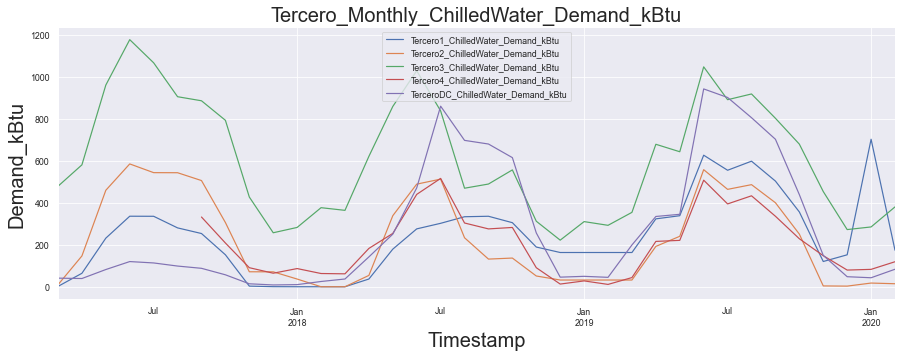

In [38]:
chw_month.plot(figsize=(15,5))
plt.xlabel("Timestamp",fontsize = 20)
plt.ylabel("Demand_kBtu",fontsize = 20)

plt.title("Tercero_Monthly_ChilledWater_Demand_kBtu",fontsize = 20)

In [39]:
# tags = pi.search_by_point(['aiTIT4045*'])

tag6 = pi.search_by_point(['Tercero1_Steam_Demand_kBtu',
 'Tercero2_Steam_Demand_kBtu',
 'Tercero3_Steam_Demand_kBtu',
 'Tercero4_Steam_Demand_kBtu',
 'TerceroDC_Steam_Demand_kBtu'])

tag6

['Tercero1_Steam_Demand_kBtu',
 'Tercero2_Steam_Demand_kBtu',
 'Tercero3_Steam_Demand_kBtu',
 'Tercero4_Steam_Demand_kBtu',
 'TerceroDC_Steam_Demand_kBtu']

In [40]:
# Required parameters
start = '2017-03-01'
end = '2020-03-01'    

calc = 'summary' # Can be 'summary', 'interpolated', or 'recorded'
interval = '1mo' # Can be '15min', '1h', '1d', or '1mo'   

# Extras
chunk_size = 10
weight = 'TimeWeighted'
summary_calc = 'average' # Can be 'average', 'minimum', 'maximum', 'range', 'stddev', 'count', 'percentgood', 'max', 'total', 'none', 'all'
max_count = round(1500000/len(tag6))

steam_month = pi.get_stream_by_point(tag6, start=start, end=end, _convert_cols=False, calculation=calc, 
                            interval=interval, _weight=weight, _summary_type=summary_calc, _max_count=max_count, 
                            _chunk_size=chunk_size)
steam_month.head()

09:15:25: Sending API request... Chunk 1 of 1
09:15:26: Response recieved for 5 tags! (1.37)


,Tercero1_Steam_Demand_kBtu,Tercero2_Steam_Demand_kBtu,Tercero3_Steam_Demand_kBtu,Tercero4_Steam_Demand_kBtu,TerceroDC_Steam_Demand_kBtu
Timestamp,,,,,
2017-03-01,264.380399,194.770185,863.751989,NaN,385.892236
2017-04-01,96.298550,109.103480,750.109360,NaN,1178.789608
2017-05-01,88.241919,101.383815,591.802704,NaN,911.374098
2017-06-01,52.750607,46.621176,319.334433,NaN,361.296373
2017-07-01,80.497646,37.247334,217.539748,NaN,363.100247


Text(0.5, 1.0, 'Tercero_Monthly_Steam_Demand_kBtu')

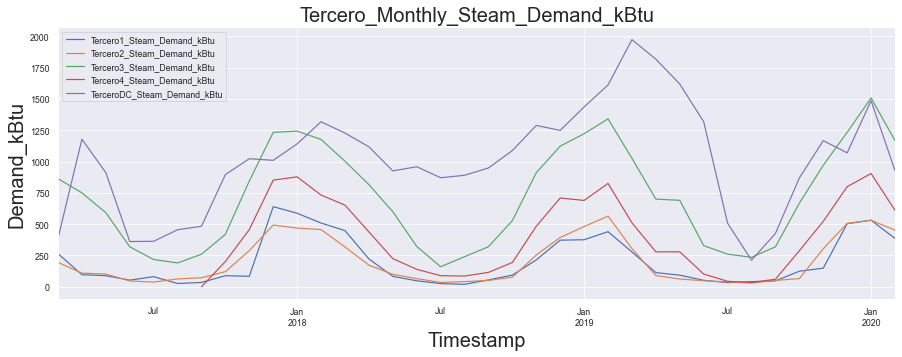

In [41]:
steam_month.plot(figsize=(15,5))
plt.xlabel("Timestamp",fontsize = 20)
plt.ylabel("Demand_kBtu",fontsize = 20)

plt.title("Tercero_Monthly_Steam_Demand_kBtu",fontsize = 20)

Text(0.5, 1.0, 'Tercero_Compare_Electricty_Demand_kBtu')

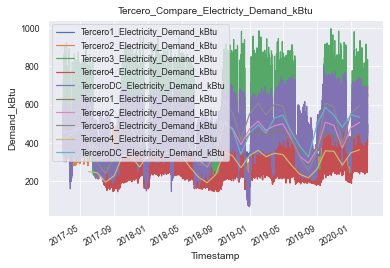

In [43]:
ax = elec.plot()

elec_month.plot(ax=ax)
plt.xlabel("Timestamp",fontsize = 10)
plt.ylabel("Demand_kBtu",fontsize = 10)

plt.title("Tercero_Compare_Electricty_Demand_kBtu",fontsize = 10)

Text(0.5, 1.0, 'Tercero_Compare_Steam_Demand_kBtu')

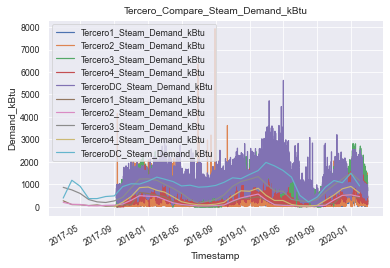

In [44]:
ax = steam.plot()

steam_month.plot(ax=ax)
plt.xlabel("Timestamp",fontsize = 10)
plt.ylabel("Demand_kBtu",fontsize = 10)

plt.title("Tercero_Compare_Steam_Demand_kBtu",fontsize = 10)

In [45]:
#1. 1 must compare the same commodity
# When comparing the same commodity between the differnt time intervals of the 
# building I notcied that the data had many peaks, the peaks could be contributed to certain 
# days in the dorm halls when the weather outside resulted in inccreased usage of the AC in 
# the summer months and the data is incredibly during the summer months due to majority sudents being home

In [46]:
#Plotting all commodity and comparing two buildings

In [47]:
# tags = pi.search_by_point(['aiTIT4045*'])

tag7 = pi.search_by_point(['Tercero1_Electricity_Demand_kBtu','Tercero1_ChilledWater_Demand_kBtu', 'Tercero1_Steam_Demand_kBtu'])

tag7

['Tercero1_Electricity_Demand_kBtu',
 'Tercero1_ChilledWater_Demand_kBtu',
 'Tercero1_Steam_Demand_kBtu']

In [48]:
# Required parameters
start = '2017-03-01'
end = '2020-03-01'    

calc = 'summary' # Can be 'summary', 'interpolated', or 'recorded'
interval = '1mo' # Can be '15min', '1h', '1d', or '1mo'   

# Extras
chunk_size = 10
weight = 'TimeWeighted'
summary_calc = 'average' # Can be 'average', 'minimum', 'maximum', 'range', 'stddev', 'count', 'percentgood', 'max', 'total', 'none', 'all'
max_count = round(1500000/len(tag7))

combine1 = pi.get_stream_by_point(tag7, start=start, end=end, _convert_cols=False, calculation=calc, 
                            interval=interval, _weight=weight, _summary_type=summary_calc, _max_count=max_count, 
                            _chunk_size=chunk_size)
combine1.head()

09:17:10: Sending API request... Chunk 1 of 1
09:17:12: Response recieved for 3 tags! (1.81)


,Tercero1_Electricity_Demand_kBtu,Tercero1_ChilledWater_Demand_kBtu,Tercero1_Steam_Demand_kBtu
Timestamp,,,
2017-03-01,417.907248,1.658213,264.380399
2017-04-01,434.561594,64.039666,96.298550
2017-05-01,441.193662,231.395942,88.241919
2017-06-01,399.468264,335.744605,52.750607
2017-07-01,371.454531,335.426158,80.497646


In [49]:
# tags = pi.search_by_point(['aiTIT4045*'])

tag8 = pi.search_by_point(['Tercero3_Electricity_Demand_kBtu','Tercero3_ChilledWater_Demand_kBtu', 'Tercero3_Steam_Demand_kBtu'])

tag8


['Tercero3_Electricity_Demand_kBtu',
 'Tercero3_ChilledWater_Demand_kBtu',
 'Tercero3_Steam_Demand_kBtu']

In [50]:
# Required parameters
start = '2017-03-01'
end = '2020-03-01'    

calc = 'summary' # Can be 'summary', 'interpolated', or 'recorded'
interval = '1mo' # Can be '15min', '1h', '1d', or '1mo'   

# Extras
chunk_size = 10
weight = 'TimeWeighted'
summary_calc = 'average' # Can be 'average', 'minimum', 'maximum', 'range', 'stddev', 'count', 'percentgood', 'max', 'total', 'none', 'all'
max_count = round(1500000/len(tag8))

combine2 = pi.get_stream_by_point(tag8, start=start, end=end, _convert_cols=False, calculation=calc, 
                            interval=interval, _weight=weight, _summary_type=summary_calc, _max_count=max_count, 
                            _chunk_size=chunk_size)
combine2.head()

09:17:13: Sending API request... Chunk 1 of 1
09:17:15: Response recieved for 3 tags! (1.58)


,Tercero3_Electricity_Demand_kBtu,Tercero3_ChilledWater_Demand_kBtu,Tercero3_Steam_Demand_kBtu
Timestamp,,,
2017-03-01,546.466664,478.394020,863.751989
2017-04-01,570.895000,580.304881,750.109360
2017-05-01,580.231429,960.221944,591.802704
2017-06-01,435.864701,1176.327680,319.334433
2017-07-01,296.815345,1066.046473,217.539748


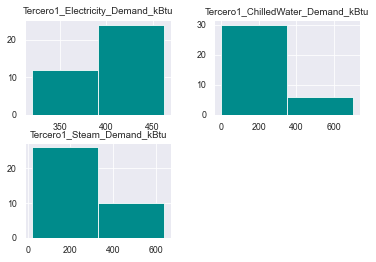

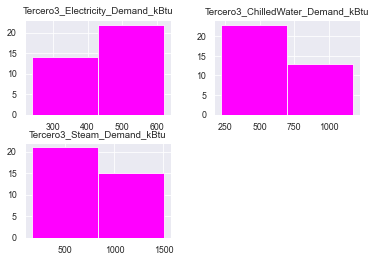

In [92]:
hist = combine1.hist(bins=2,color=['darkcyan']) 
hist2 = combine2.hist(bins=2, color=['magenta'])

Text(0.5, 1.0, 'Tercero_Steam_Electricty_Demand_kBtu')

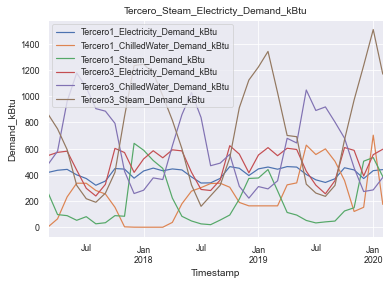

In [51]:
ax = combine1.plot()

combine2.plot(ax=ax)
plt.xlabel("Timestamp",fontsize = 10)
plt.ylabel("Demand_kBtu",fontsize = 10)

plt.title("Tercero_Steam_Electricty_Demand_kBtu",fontsize = 10)

In [ ]:
# For part 2 of question 2 on the intstructions I tried creating a bar graph that would 
# compare each building with the differing commodities however I would have to manually
# enter the data for each building which I found to be inefficient. I am not sure how 
# I would combine the data of just the two individual building of each commodity together in a bar graph or pie chart